In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=100)
heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)
y_probs[:5] # 0. index negatif olma, 1. index pozitif olma olasılığı

array([[0.67, 0.33],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.42, 0.58]])

In [55]:
# ROC değeri Gerçek pozitif oranı  yanlış pozitif oranına göre 
# çizildği için [0][1] index de bulunan veriler alınır 
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.33, 0.01, 0.96, 0.03, 0.58, 0.96, 0.54, 0.9 , 0.05, 0.97])

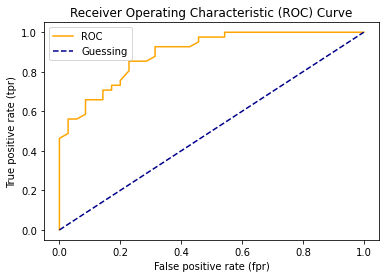

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

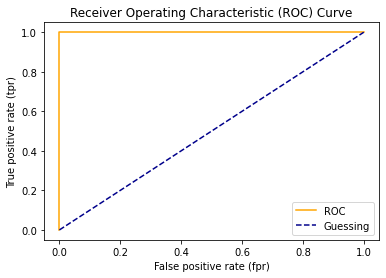

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_test) # %100 doğru model
plot_roc_curve(fpr, tpr)

In [58]:
roc_auc_score(y_test, y_probs_positive)

0.8940766550522649

---
### Confusion matrix

`Confusion matrix`, bir modelin öngördüğü etiketleri ve tahmin etmesi gereken gerçek etiketleri karşılaştırmanın hızlı bir yoludur. 

---

In [59]:
# TN(0,0) - FN(1,0) - FP(0,1) - TN(1,1) matrix değelerini verir.
y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[25, 10],
       [ 6, 35]])

In [60]:
# Daha anşalışır bir çıktı için 
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,25,10
1,6,35


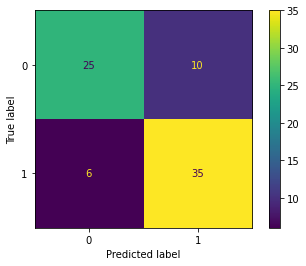

In [69]:
# Görsel olarak çıktı vermek
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

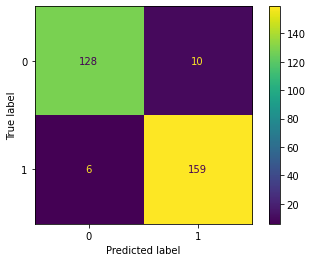

In [64]:
# Tüm verilerde
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

In [67]:
from sklearn.metrics import classification_report

#  Model performansını değerlendirmek için kullanılır
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.78      0.85      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76

